# RESULTS

Analysis results:

    1. Ship length is between 0 and 400 meters. 
    2. Mean length is about 87 meters, however, the most common one is 21 meters. 
    3. Half of the ship has the size < 21 meters. 
    4. 75% of the ships has the size < 176 meters. 
    5. Among 2359 ships, there is only 170 unique Length sizes. 
    6. Analysis showed that among 2359 ships present, if we would like to have 5 classes, there shuld be about 472 ships per class. Cuts should be made on meters: CUTS = [12, 17, 26, 230]. Then, the number of ships for every class would be: (485, 475, 492, 478, 429). 

Thus, ships classes would be defined as: 

    > tiny ship (malutki statek) = < 12m
    > small ship (mały statek) =  => 12m AND < 17m
    > medium ship (średni statek) = > 17m AND < 26m
    > big ship (duży statek) = > 26m AND < 230m
    > huge ship (ogromny statek) = > 230m

Z algorytmu KMeans wynika, że:

    > Powinny powstać 3 klasy
    > Punkty cięć dla klas powinny wynosić: 110, 265
    > 3 Klasy: small ship, medium ship, big ship

Data: 

In [238]:
df

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,LONpx_X2,LATpx_Y2
0,311827000,2021-01-06 01:50:18.500,33.735010,-118.143113,0.1,0.8,261.0,NORWEGIAN JEWEL,IMO9304045,C6TX6,60.0,1.0,294.0,37.0,8.3,NaN,A,3018,1097
1,367369720,2021-01-06 01:50:18.500,33.735033,-118.159440,0.0,327.6,272.0,ALTA JUNE,IMO9552290,WDE5645,31.0,0.0,23.0,10.0,NaN,NaN,A,2836,1097
2,367655170,2021-01-06 01:50:18.500,33.723813,-118.280826,0.5,42.5,511.0,PACIFIC STAR,IMO0000000,WDH8150,34.0,NaN,22.0,8.0,NaN,NaN,B,1485,1222
3,367344710,2021-01-06 01:50:18.500,33.614810,-117.914550,0.0,34.9,25.0,SERENGETI,NaN,WDE3827,37.0,5.0,35.0,7.0,NaN,37.0,A,5562,2435
4,636019717,2021-01-06 01:50:18.500,33.677190,-118.210063,0.2,295.9,269.0,VOLANS,IMO9430777,D5VV2,71.0,1.0,265.0,32.0,11.5,71.0,A,2272,1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,338330416,2021-06-17 01:49:58.500,33.615260,-117.901970,0.0,83.8,511.0,QUICK SPIN,IMO0000000,NaN,37.0,NaN,16.0,4.0,NaN,NaN,B,5704,2432
2718,367314820,2021-06-17 01:49:58.500,33.717784,-118.279090,0.0,302.4,511.0,SUNDANCE,NaN,WDD9682,37.0,NaN,18.0,5.0,NaN,NaN,B,1506,1290
2719,338300994,2021-06-17 01:49:58.500,33.615235,-117.915789,0.0,312.2,511.0,THE J'S SEA,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,B,5550,2432
2720,338241559,2021-06-17 01:49:58.500,33.606000,-117.904810,0.0,54.6,511.0,HAPPY DAYS,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,B,5673,2535


Visualization of data: 

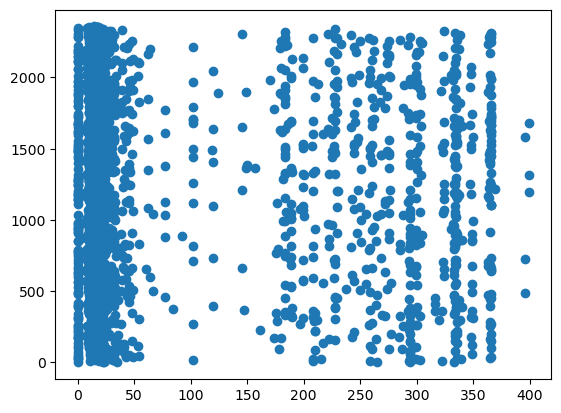

Number of clusters (3 is recommended by this method): 

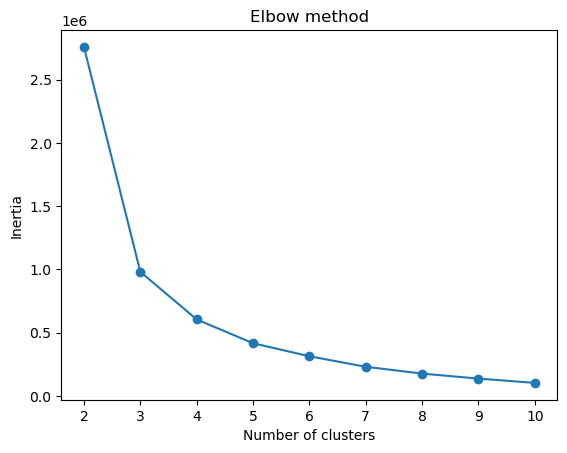

K-Means clustering (3 clusters): 

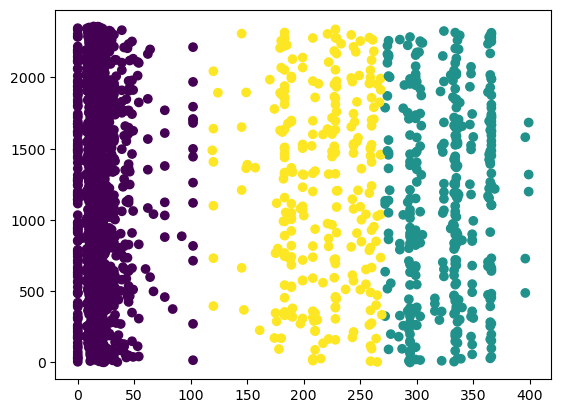

K-Means clustering (4 clusters): 

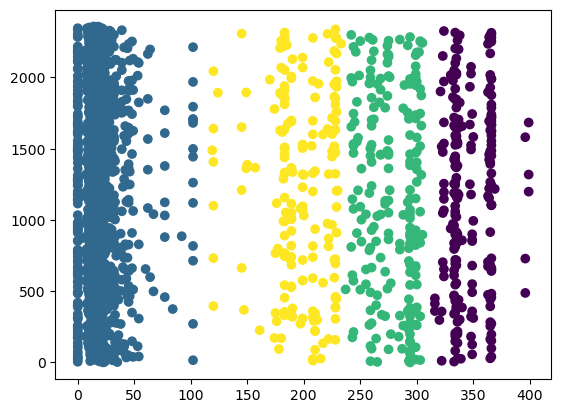

K-Means clustering (5 clusters): 

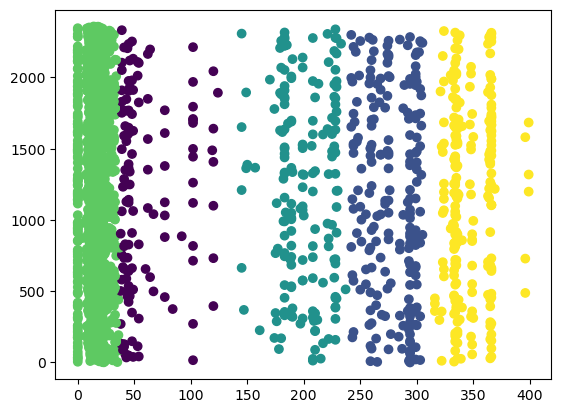

Length (x-axis) vs Width (y-axis) of the ship: 

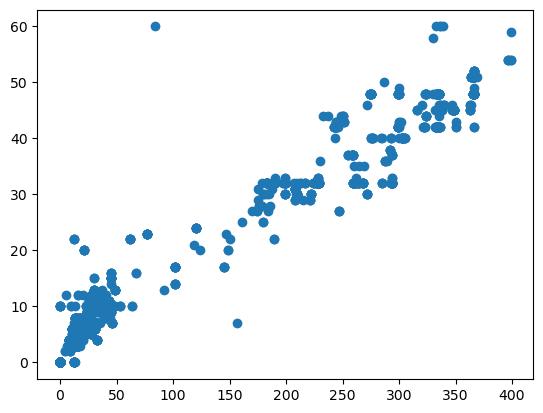

K-Means for Length (x-axis) vs Width (y-axis) of the ship (2 clusters): 

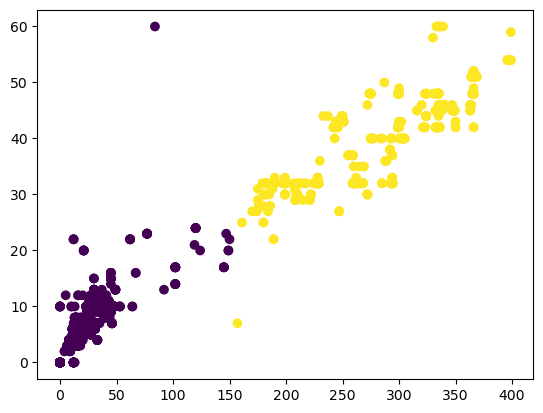

K-Means for Length (x-axis) vs Width (y-axis) of the ship (3 clusters = RECOMMENDED SOLUTION): 

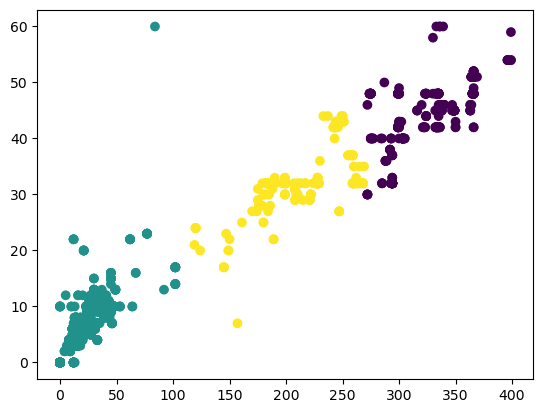

K-Means for Length (x-axis) vs Width (y-axis) of the ship (4 clusters): 

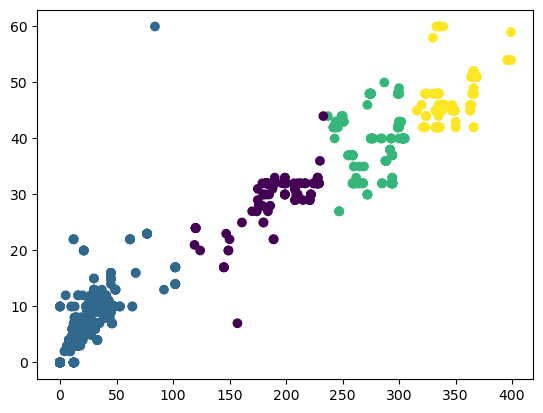

K-Means for Length (x-axis) vs Width (y-axis) of the ship (5 clusters): 

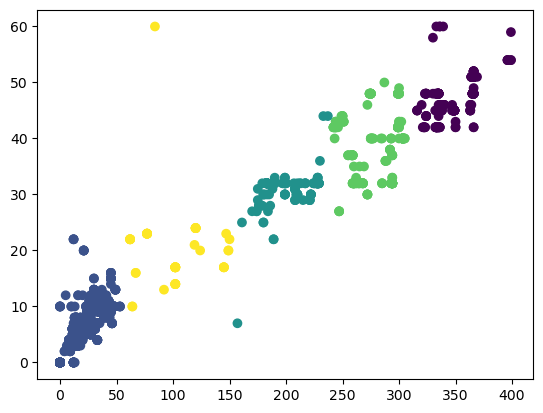

# --------------------------------------------------------------------------------------------------------------

# CODE

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
AIS_DF_COLUMNS = ['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselName', 'IMO', 'CallSign',
                  'VesselType', 'Status', 'Length', 'Width', 'Draft', 'Cargo', 'TranscieverClass'
                  ]

In [3]:
main_pictures = os.listdir('../main_pictures_areas')
main_pictures

['S1A_IW_GRDH_1SDV_20210106T015004_20210106T015033_036011_04381A_71E9_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20210118T135238_20210118T135303_036193_043E88_BD9D_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20210204T015812_20210204T015841_036434_0446E1_2157_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20210216T015812_20210216T015841_036609_044CFF_DCCD_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20210518T135239_20210518T135304_037943_047A68_D67F_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20210628T015816_20210628T015845_038534_048C1A_58FD_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20210822T015011_20210822T015040_039336_04A543_1E3D_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20210903T135246_20210903T135311_039518_04AB89_822E_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20210915T135246_20210915T135311_039693_04B182_5934_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20210927T135246_20210927T135311_039868_04B77E_B81B_original_picture_0.csv',
 'S1A_IW_GRDH_1SDV_20211208T135245_20211208T135310

In [4]:
all_files = glob.glob(os.path.join('..\\main_pictures_areas', "*.csv"))
all_files

['..\\main_pictures_areas\\S1A_IW_GRDH_1SDV_20210106T015004_20210106T015033_036011_04381A_71E9_original_picture_0.csv',
 '..\\main_pictures_areas\\S1A_IW_GRDH_1SDV_20210118T135238_20210118T135303_036193_043E88_BD9D_original_picture_0.csv',
 '..\\main_pictures_areas\\S1A_IW_GRDH_1SDV_20210204T015812_20210204T015841_036434_0446E1_2157_original_picture_0.csv',
 '..\\main_pictures_areas\\S1A_IW_GRDH_1SDV_20210216T015812_20210216T015841_036609_044CFF_DCCD_original_picture_0.csv',
 '..\\main_pictures_areas\\S1A_IW_GRDH_1SDV_20210518T135239_20210518T135304_037943_047A68_D67F_original_picture_0.csv',
 '..\\main_pictures_areas\\S1A_IW_GRDH_1SDV_20210628T015816_20210628T015845_038534_048C1A_58FD_original_picture_0.csv',
 '..\\main_pictures_areas\\S1A_IW_GRDH_1SDV_20210822T015011_20210822T015040_039336_04A543_1E3D_original_picture_0.csv',
 '..\\main_pictures_areas\\S1A_IW_GRDH_1SDV_20210903T135246_20210903T135311_039518_04AB89_822E_original_picture_0.csv',
 '..\\main_pictures_areas\\S1A_IW_GRDH_1

In [14]:
df = pd.concat((pd.read_csv(f, index_col=0) for f in all_files), ignore_index=True)
df

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,LONpx_X2,LATpx_Y2
0,311827000,2021-01-06 01:50:18.500,33.735010,-118.143113,0.1,0.8,261.0,NORWEGIAN JEWEL,IMO9304045,C6TX6,60.0,1.0,294.0,37.0,8.3,NaN,A,3018,1097
1,367369720,2021-01-06 01:50:18.500,33.735033,-118.159440,0.0,327.6,272.0,ALTA JUNE,IMO9552290,WDE5645,31.0,0.0,23.0,10.0,NaN,NaN,A,2836,1097
2,367655170,2021-01-06 01:50:18.500,33.723813,-118.280826,0.5,42.5,511.0,PACIFIC STAR,IMO0000000,WDH8150,34.0,NaN,22.0,8.0,NaN,NaN,B,1485,1222
3,367344710,2021-01-06 01:50:18.500,33.614810,-117.914550,0.0,34.9,25.0,SERENGETI,NaN,WDE3827,37.0,5.0,35.0,7.0,NaN,37.0,A,5562,2435
4,636019717,2021-01-06 01:50:18.500,33.677190,-118.210063,0.2,295.9,269.0,VOLANS,IMO9430777,D5VV2,71.0,1.0,265.0,32.0,11.5,71.0,A,2272,1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11571,338311935,2021-11-25 01:57:58.500,33.759393,-118.185090,0.0,122.5,511.0,SEAFOX,IMO0000000,NaN,36.0,NaN,16.0,6.0,NaN,NaN,B,2566,663
11572,636014430,2021-11-25 01:57:58.500,33.765107,-118.260636,0.0,357.5,176.0,KEFALONIA,IMO9382188,A8TU4,80.0,5.0,102.0,17.0,6.6,80.0,A,1725,599
11573,477333700,2021-11-25 01:57:58.500,33.746131,-118.206939,0.0,216.7,180.0,INCHEON BAY,IMO9791963,VRQO6,70.0,5.0,NaN,NaN,NaN,70.0,A,2322,810
11574,255790000,2021-11-25 01:57:58.500,33.733237,-118.169180,0.1,242.6,324.0,MSC TAMPICO,IMO9317937,CQMD,70.0,1.0,294.0,32.0,9.1,70.0,A,2743,954


## SHIP LENGTH ANALYSIS

1. Ship length is between 0 and 400 meters. 
2. Mean length is about 87 meters, however, the most common one is 21 meters. 
3. Half of the ship has the size < 21 meters. 
4. 75% of the ships has the size < 176 meters. 
5. Among 2359 ships, there is only 170 unique Length sizes. 
6. Analysis showed that among 2359 ships present, if we would like to have 5 classes, there shuld be about 472 ships per class. Cuts should be made on meters: CUTS = [12, 17, 26, 230]. Then, the number of ships for every class would be: (485, 475, 492, 478, 429). 

Thus, ships classes would be defined as: 

    > tiny ship (malutki statek) = < 12m
    > small ship (mały statek) =  => 12m AND < 17m
    > medium ship (średni statek) = > 17m AND < 26m
    > big ship (duży statek) = > 26m AND < 230m
    > huge ship (ogromny statek) = > 230m

In [10]:
area_df = df['Length'].dropna().reset_index(drop=True)
area_df

0        294.0
1         23.0
2         22.0
3         35.0
4        265.0
         ...  
10361    189.0
10362     16.0
10363    102.0
10364    294.0
10365     14.0
Name: Length, Length: 10366, dtype: float64

In [13]:
area_df = df['Length'].dropna().reset_index(drop=True)
area_df = area_df[area_df.values > 5].reset_index(drop=True)
area_df

0       294.0
1        23.0
2        22.0
3        35.0
4       265.0
        ...  
9835    189.0
9836     16.0
9837    102.0
9838    294.0
9839     14.0
Name: Length, Length: 9840, dtype: float64

In [14]:
area_df.describe()

count    9840.000000
mean       90.075508
std       117.608435
min         6.000000
25%        14.000000
50%        22.000000
75%       183.000000
max       400.000000
Name: Length, dtype: float64

In [15]:
print(f"Total number of ships: {len(area_df)}")

Total number of ships: 9840


In [16]:
area_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9840 entries, 0 to 9839
Series name: Length
Non-Null Count  Dtype  
--------------  -----  
9840 non-null   float64
dtypes: float64(1)
memory usage: 77.0 KB


In [17]:
area_df.nunique()

231

In [18]:
print(sorted(area_df.unique()))

[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 53.0, 54.0, 59.0, 60.0, 62.0, 63.0, 64.0, 67.0, 68.0, 70.0, 71.0, 73.0, 74.0, 77.0, 84.0, 92.0, 102.0, 105.0, 106.0, 116.0, 119.0, 120.0, 124.0, 134.0, 138.0, 142.0, 143.0, 145.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 164.0, 166.0, 168.0, 169.0, 170.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 202.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 213.0, 215.0, 216.0, 217.0, 218.0, 220.0, 221.0, 222.0, 224.0, 225.0, 227.0, 228.0, 229.0, 230.0, 233.0, 237.0, 238.0, 239.0, 240.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 249.0, 250.0, 251.0, 252.0, 255.0

# CUTS = [13, 21, 87, 176]
# (599, 610, 522, 40, 588)

In [105]:
CUTS = [12, 17, 26, 230]
cut1 = area_df[area_df <= CUTS[0]].count()
cut2 = area_df[(area_df > CUTS[0]) & (area_df <= CUTS[1])].count()
cut3 = area_df[(area_df > CUTS[1]) & (area_df <= CUTS[2])].count()
cut4 = area_df[(area_df > CUTS[2]) & (area_df <= CUTS[3])].count()
cut5 = area_df[area_df > CUTS[3]].count()
cut1, cut2, cut3, cut4, cut5

(485, 475, 492, 478, 429)

In [85]:
sum_ships = cut1 + cut2 + cut3 + cut4 + cut5
print(sum_ships)
ships_per_class = sum_ships / 5
print(ships_per_class)

2359
471.8


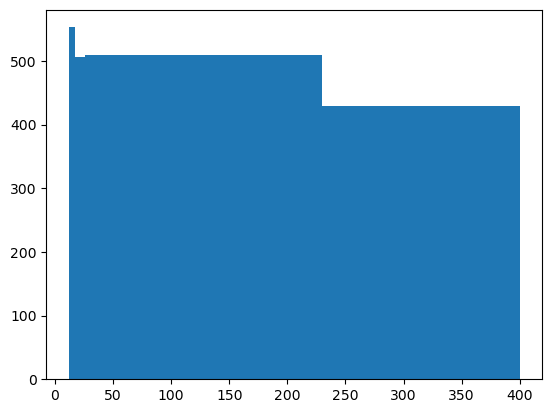

In [229]:
x = list(area_df)
plt.hist(x, bins=[12, 17, 26, 230, 400])
plt.show()

# POINTS VISULIZATION

In [33]:
np.array(x).shape

(9840,)

In [32]:
np.array(y).shape

(9840,)

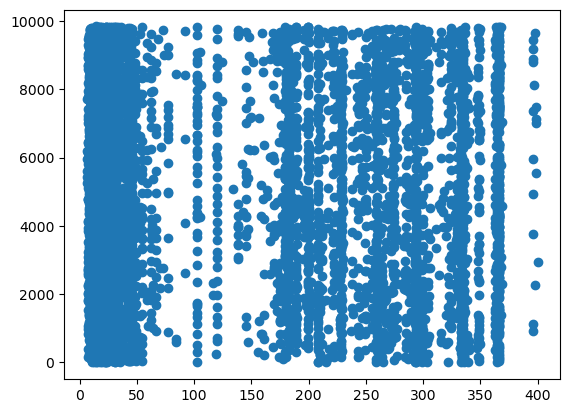

In [30]:
x = list(area_df.values)
y = list(area_df.index)

plt.scatter(x, y)
plt.show()

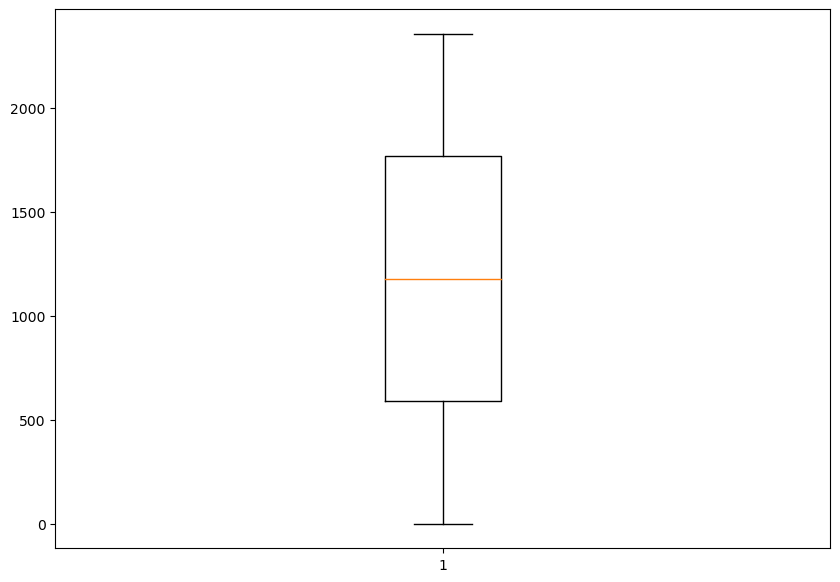

In [114]:
# Import libraries
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (10, 7))
 
# Creating plot
plt.boxplot(y)
 
# show plot
plt.show()

### Calculate how many classes there should be

In [125]:
np.array(x)

array([294.,  23.,  22., ...,  16.,  18.,  14.])

In [122]:
np.array(y)

array([   0,    1,    2, ..., 2356, 2357, 2358])

In [24]:
# Data processing 
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset
from sklearn import datasets
# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [26]:
x = np.array(x).reshape(-1, 1)
x

array([[294.],
       [ 23.],
       [ 22.],
       ...,
       [102.],
       [294.],
       [ 14.]])

In [35]:
new_df = df[['MMSI', 'Length']].dropna().reset_index(drop=True)
new_df = new_df[new_df.Length > 5].reset_index(drop=True)
new_df

,MMSI,Length
0,311827000,294.0
1,367369720,23.0
2,367655170,22.0
3,367344710,35.0
4,636019717,265.0
...,...,...
9835,371055000,189.0
9836,338311935,16.0
9837,636014430,102.0
9838,255790000,294.0


In [38]:
x = np.array(x).reshape(-1, 1)
x

array([[294.],
       [ 23.],
       [ 22.],
       ...,
       [102.],
       [294.],
       [ 14.]])

In [40]:


# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 3)
# Fit and predict on the data
y_hc = hc.fit_predict(x)
# Save the predictions as a column
new_df['y_hc']= y_hc
# Check the distribution
new_df['y_hc'].value_counts()


1    7127
0    1663
2    1050
Name: y_hc, dtype: int64

In [41]:
new_df

,MMSI,Length,y_hc
0,311827000,294.0,0
1,367369720,23.0,1
2,367655170,22.0,1
3,367344710,35.0,1
4,636019717,265.0,0
...,...,...,...
9835,371055000,189.0,2
9836,338311935,16.0,1
9837,636014430,102.0,1
9838,255790000,294.0,0


In [136]:
y_hc

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [230]:
x = np.array(area_df.values).reshape(-1,1)
y = np.array(area_df.index).reshape(-1,1)

In [43]:
from sklearn.cluster import KMeans

data = x
inertias = []

for i in range(2,11):
    hc = AgglomerativeClustering(n_clusters = i)
    y_hc = hc.fit_predict(x)
    inertias.append(y_hc.inertia_)

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'inertia_'

In [167]:
x.dtype

dtype('float64')

In [172]:
x = x.reshape(-1)

In [173]:
x

array([294.,  23.,  22., ...,  16.,  18.,  14.])

In [174]:
x.shape

(2359,)

In [180]:
x = x.reshape(-1,1)

In [181]:
x.shape

(2359, 1)

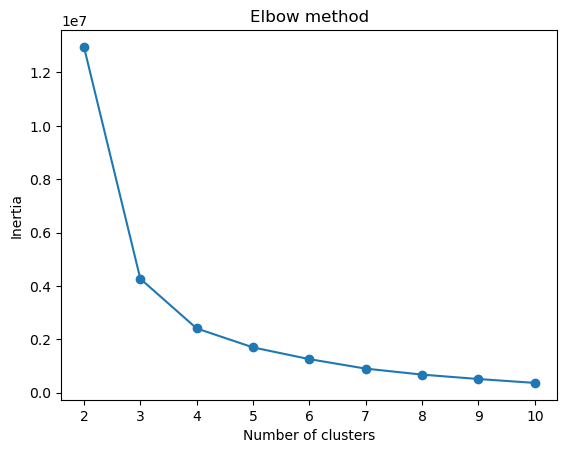

In [20]:
from sklearn.cluster import KMeans

#data = list(zip(np.array(y), np.array(x)))
inertias = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(np.array(x).reshape(-1, 1))
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

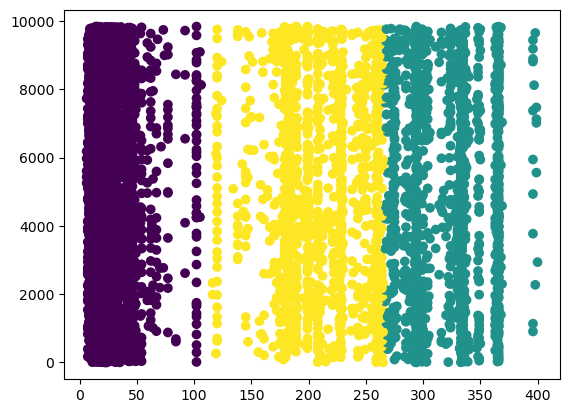

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [57]:
x

array([[294.],
       [ 23.],
       [ 22.],
       ...,
       [102.],
       [294.],
       [ 14.]])

In [62]:
x.shape

(9840, 1)

In [49]:
kmeans.labels_

array([1, 0, 0, ..., 0, 1, 0])

In [64]:
kmeans.labels_.reshape(-1, 1).shape

(9840, 1)

In [51]:
kmeans.cluster_centers_

array([[ 20.53696388],
       [323.85459534],
       [207.57109737]])

In [68]:
df = pd.DataFrame(x, columns = ['length_value'])
df['class'] = kmeans.labels_
df

,length_value,class
0,294.0,1
1,23.0,0
2,22.0,0
3,35.0,0
4,265.0,2
...,...,...
9835,189.0,2
9836,16.0,0
9837,102.0,0
9838,294.0,1


In [71]:
df[df['class'] == 0].max()

length_value    106.0
class             0.0
dtype: float64

In [76]:
df[df['class'] == 2].min()

length_value    116.0
class             2.0
dtype: float64

In [74]:
df[df['class'] == 2].max()

length_value    265.0
class             2.0
dtype: float64

In [75]:
df[df['class'] == 1].min()

length_value    266.0
class             1.0
dtype: float64

Z algorytmu KMeans wynika, że:

    > Powinny powstać 3 klasy
    > Punkty cięć dla klas powinny wynosić: 110, 265
    > 3 Klasy: small ship, medium ship, big ship

In [52]:
kmeans.inertia_

4268137.666254976

In [53]:
kmeans.n_iter_

3

In [54]:
kmeans.n_features_in_

1

In [56]:
kmeans.n_features_in_

1

In [ ]:
kmeans.n_iter_

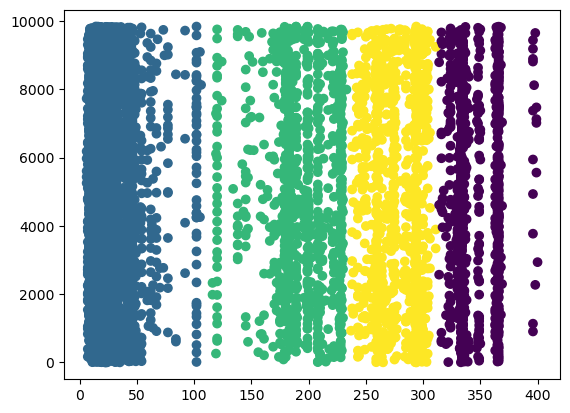

In [77]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [78]:
df = pd.DataFrame(x, columns = ['length_value'])
df['class'] = kmeans.labels_
df

,length_value,class
0,294.0,3
1,23.0,1
2,22.0,1
3,35.0,1
4,265.0,3
...,...,...
9835,189.0,2
9836,16.0,1
9837,102.0,1
9838,294.0,3


In [86]:
df[df['class'] == 1].min()

length_value    6.0
class           1.0
dtype: float64

In [80]:
df[df['class'] == 1].max()

length_value    106.0
class             1.0
dtype: float64

In [85]:
df[df['class'] == 2].min()

length_value    116.0
class             2.0
dtype: float64

In [81]:
df[df['class'] == 2].max()

length_value    233.0
class             2.0
dtype: float64

In [84]:
df[df['class'] == 3].min()

length_value    237.0
class             3.0
dtype: float64

In [82]:
df[df['class'] == 3].max()

length_value    311.0
class             3.0
dtype: float64

In [83]:
df[df['class'] == 0].min()

length_value    314.0
class             0.0
dtype: float64

In [79]:
df[df['class'] == 0].max()

length_value    400.0
class             0.0
dtype: float64

In [47]:
kmeans.labels_

array([2, 1, 1, ..., 4, 2, 1])

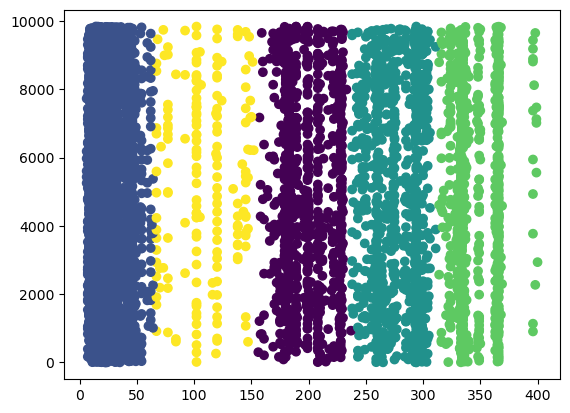

In [46]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [184]:
def get_jenks_breaks(data_list, number_class):
    data_list.sort()
    mat1 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat1.append(temp)
    mat2 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat2.append(temp)
    for i in range(1, number_class + 1):
        mat1[1][i] = 1
        mat2[1][i] = 0
        for j in range(2, len(data_list) + 1):
            mat2[j][i] = float('inf')
    v = 0.0
    for l in range(2, len(data_list) + 1):
        s1 = 0.0
        s2 = 0.0
        w = 0.0
        for m in range(1, l + 1):
            i3 = l - m + 1
            val = float(data_list[i3 - 1])
            s2 += val * val
            s1 += val
            w += 1
            v = s2 - (s1 * s1) / w
            i4 = i3 - 1
            if i4 != 0:
                for j in range(2, number_class + 1):
                    if mat2[l][j] >= (v + mat2[i4][j - 1]):
                        mat1[l][j] = i3
                        mat2[l][j] = v + mat2[i4][j - 1]
        mat1[l][1] = 1
        mat2[l][1] = v
    k = len(data_list)
    kclass = []
    for i in range(number_class + 1):
        kclass.append(min(data_list))
    kclass[number_class] = float(data_list[len(data_list) - 1])
    count_num = number_class
    while count_num >= 2:  # print "rank = " + str(mat1[k][count_num])
        idx = int((mat1[k][count_num]) - 2)
        # print "val = " + str(data_list[idx])
        kclass[count_num - 1] = data_list[idx]
        k = int((mat1[k][count_num] - 1))
        count_num -= 1
    return kclass

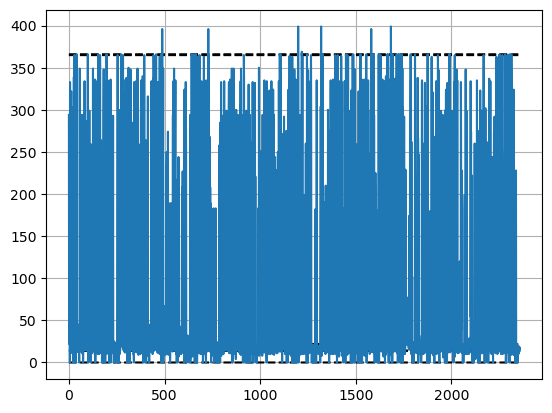

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# x = np.random.random(30)
breaks = get_jenks_breaks(x, 5)

for line in breaks:
    plt.plot([line for _ in range(len(x))], 'k--')

plt.plot(x)
plt.grid(True)
plt.show()

In [29]:
length = np.array(df['Length'].dropna())
length

array([294.,  23.,  22., ...,  16.,  18.,  14.])

In [189]:
x = area_df.values
x

array([294.,  23.,  22., ...,  16.,  18.,  14.])

In [193]:
import kmeans1d

# x = [4.0, 4.1, 4.2, -50, 200.2, 200.4, 200.9, 80, 100, 102]
k = 5

clusters, centroids = kmeans1d.cluster(x, k)

print(clusters)   # [1, 1, 1, 0, 3, 3, 3, 2, 2, 2]
print(centroids)  # [-50.0, 4.1, 94.0, 200.5]

[3, 0, 0, 0, 3, 0, 4, 0, 0, 3, 0, 3, 4, 2, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 3, 2, 4, 2, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 4, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 1, 0, 2, 0, 0, 3, 0, 2, 0, 3, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 1, 3, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 2, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 1, 1, 2, 4, 0, 0, 3, 0, 0, 0, 0, 3, 0, 4, 0, 4, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 2, 0, 4, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 4, 3, 3, 3, 2, 0, 0, 3, 0, 2, 0, 

In [191]:
kmeans1d.inertia_

AttributeError: module 'kmeans1d' has no attribute 'inertia_'

In [ ]:
from sklearn.cluster import KMeans

#data = list(zip(np.array(y), np.array(x)))
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21760\527400400.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  classifications = np.zeros((points.shape[0],), dtype=np.int)


AttributeError: 'AxesSubplot' object has no attribute 'set_xlimt'

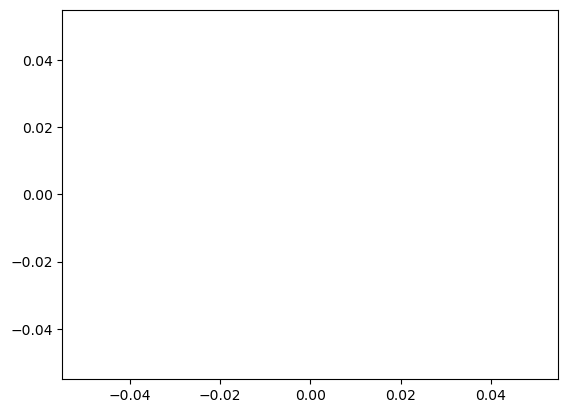

In [192]:
import numpy as np  
import matplotlib.pyplot as plt  
import colorsys  
import sys  

K = 3   # no. of centroids for computing  
nmbrClusters = 3 # actual no. of clusters that are to be generated  
pntsPerCluster = 40  # no. of points per actual cluster  
xCntrBounds = (-2, 2) # the limits within which the to actual cluster centers are to be placed  
# Randomly placing the cluster centers within the area of xCntrBounds.  
centers = np.random.random_sample((nmbrClusters,))  
centers = centers * (xCntrBounds[1] - xCntrBounds[0]) + xCntrBounds[0]  
# Initializing the array of data pts.  
points = np.zeros((nmbrClusters * pntsPerCluster,))  
# Normally distributing the pntsPerCluster points around the each center.  
stDev = 0.15  
for i in range(nmbrClusters):  
    points[i*pntsPerCluster:(i+1)*pntsPerCluster] = (  
        stDev * np.random.randn(pntsPerCluster) + centers[i])  
# Selecting K points randomly as initial centroid locations.  
centroids = np.zeros((K,))  
indices = []  
while len(indices) < K:  
    index = np.random.randint(0, nmbrClusters * pntsPerCluster)  
    if not index in indices:  
        indices.append(index)  
centroids = points[indices]  
# Assigning each point to its closest centroid and then Storing this in the classifications,  
# where every single element must be an int ranging from 0 to K-1.  
classifications = np.zeros((points.shape[0],), dtype=np.int)  
def assignPntsToCentroids():  
    for i in range(points.shape[0]):  
        smallestDist = 0  
        for k in range(K):  
            distance = abs(points[i] - centroids[k])  
            if k == 0:  
                smallestDist = distance  
                classifications[i] = k  
            elif distance < smallestDist:  
                smallestDist = distance  
                classifications[i] = k  
assignPntsToCentroids()  
# Defining a func for recalculatinge the cluster's centroid   
def reCalcCentroids():  
    for k in range(K):  
        if sum(classifications == k) > 0:  
            centroids[k] = sum(points[classifications == k]) / sum(classifications == k)  
# Using HSV color scheme, generating a different color for each K cluster.  
# Simultaneously, initializing the matplotlib line objects for every centroid and their cluster.  
hues = np.linspace(0, 1, K+1)[:-1]  
fig, ax = plt.subplots()  
clusterPntsList = []  
centroidPntsList = []  
for k in range(K):  
    clusterColor = tuple(colorsys.hsv_to_rgb(hues[k], 0.8, 0.8))  
    clusterLineObj, = ax.plot([], [], ls='None', marker='x', color=clusterColor)  
    clusterPntsList.append(clusterLineObj)  
    centroidLineObj, = ax.plot([], [], ls='None', marker='o',  
        markeredgecolor='k', color=clusterColor)  
    centroidPntsList.append(centroidLineObj)  
iterText = ax.annotate('', xy=(0.01, 0.01), xycoords='axes fraction')  
# Defining a func for updating the plot.  
def updatePlot(iteration):  
    for k in range(K):  
        xDataNew = points[classifications == k]  
        clusterPntsList[k].set_data(xDataNew, np.zeros((len(xDataNew),)))  
        centroidPntsList[k].set_data(centroids[k], 0)  
    iterText.set_text('i = {:d}'.format(iteration))  
    plt.savefig('./{:d}.png'.format(iteration))  
    plt.pause(0.5)  
dataRange = np.amax(points) - np.amin(points)  
ax.set_xlimt(np.amin(points) - 0.05*dataRange, np.amax(points) + 0.05*dataRange)  
ax.set_ylimt(-1, 1)  
iteration = 0  
updatePlot(iteration)  
plt.ion()  
plt.show()  
# Executing and animating the algorithm using a while loop. Which isn't the best considered way for  
# animating a matplotlib plot rather the matplotlib animation module should be taken into consideration,  
# but we are using while loop here for making it easy to understand.  
last_Centroids = centroids + 1  
while not np.array_equal(centroids, last_Centroids):  
    last_Centroids = np.copy(centroids)  
    reCalcCentroids()  
    assignPntsToCentroids()  
    iteration += 1  
    updatePlot(iteration)  
pythonMajorVersion = sys.version_info[0]  
if pythonMajorVersion < 3:  
    raw_input("Press Enter to continue.")  
else:  
    input("Press Enter to continue.")  

# TWO FEATURES: Length and Width

In [15]:
df

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,LONpx_X2,LATpx_Y2
0,311827000,2021-01-06 01:50:18.500,33.735010,-118.143113,0.1,0.8,261.0,NORWEGIAN JEWEL,IMO9304045,C6TX6,60.0,1.0,294.0,37.0,8.3,NaN,A,3018,1097
1,367369720,2021-01-06 01:50:18.500,33.735033,-118.159440,0.0,327.6,272.0,ALTA JUNE,IMO9552290,WDE5645,31.0,0.0,23.0,10.0,NaN,NaN,A,2836,1097
2,367655170,2021-01-06 01:50:18.500,33.723813,-118.280826,0.5,42.5,511.0,PACIFIC STAR,IMO0000000,WDH8150,34.0,NaN,22.0,8.0,NaN,NaN,B,1485,1222
3,367344710,2021-01-06 01:50:18.500,33.614810,-117.914550,0.0,34.9,25.0,SERENGETI,NaN,WDE3827,37.0,5.0,35.0,7.0,NaN,37.0,A,5562,2435
4,636019717,2021-01-06 01:50:18.500,33.677190,-118.210063,0.2,295.9,269.0,VOLANS,IMO9430777,D5VV2,71.0,1.0,265.0,32.0,11.5,71.0,A,2272,1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11571,338311935,2021-11-25 01:57:58.500,33.759393,-118.185090,0.0,122.5,511.0,SEAFOX,IMO0000000,NaN,36.0,NaN,16.0,6.0,NaN,NaN,B,2566,663
11572,636014430,2021-11-25 01:57:58.500,33.765107,-118.260636,0.0,357.5,176.0,KEFALONIA,IMO9382188,A8TU4,80.0,5.0,102.0,17.0,6.6,80.0,A,1725,599
11573,477333700,2021-11-25 01:57:58.500,33.746131,-118.206939,0.0,216.7,180.0,INCHEON BAY,IMO9791963,VRQO6,70.0,5.0,NaN,NaN,NaN,70.0,A,2322,810
11574,255790000,2021-11-25 01:57:58.500,33.733237,-118.169180,0.1,242.6,324.0,MSC TAMPICO,IMO9317937,CQMD,70.0,1.0,294.0,32.0,9.1,70.0,A,2743,954


In [16]:
df = df[df.Length > 19].reset_index(drop=True)
df

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,LONpx_X2,LATpx_Y2
0,311827000,2021-01-06 01:50:18.500,33.735010,-118.143113,0.1,0.8,261.0,NORWEGIAN JEWEL,IMO9304045,C6TX6,60.0,1.0,294.0,37.0,8.3,NaN,A,3018,1097
1,367369720,2021-01-06 01:50:18.500,33.735033,-118.159440,0.0,327.6,272.0,ALTA JUNE,IMO9552290,WDE5645,31.0,0.0,23.0,10.0,NaN,NaN,A,2836,1097
2,367655170,2021-01-06 01:50:18.500,33.723813,-118.280826,0.5,42.5,511.0,PACIFIC STAR,IMO0000000,WDH8150,34.0,NaN,22.0,8.0,NaN,NaN,B,1485,1222
3,367344710,2021-01-06 01:50:18.500,33.614810,-117.914550,0.0,34.9,25.0,SERENGETI,NaN,WDE3827,37.0,5.0,35.0,7.0,NaN,37.0,A,5562,2435
4,636019717,2021-01-06 01:50:18.500,33.677190,-118.210063,0.2,295.9,269.0,VOLANS,IMO9430777,D5VV2,71.0,1.0,265.0,32.0,11.5,71.0,A,2272,1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,538005156,2021-11-25 01:57:58.500,33.727650,-118.154416,0.0,232.9,307.0,HTC DELTA,IMO9679385,V7BK4,70.0,1.0,189.0,32.0,12.8,70.0,A,2907,1016
5524,255806339,2021-11-25 01:57:58.500,33.753255,-118.235814,0.0,316.1,71.0,MSC ORION,IMO9857157,CQEB8,74.0,5.0,366.0,51.0,14.2,74.0,A,2001,731
5525,371055000,2021-11-25 01:57:58.500,33.650735,-118.220088,0.1,243.9,296.0,STOVE OCEAN,IMO9552953,3FXU,70.0,1.0,189.0,32.0,12.6,70.0,A,2176,1872
5526,636014430,2021-11-25 01:57:58.500,33.765107,-118.260636,0.0,357.5,176.0,KEFALONIA,IMO9382188,A8TU4,80.0,5.0,102.0,17.0,6.6,80.0,A,1725,599


In [17]:
df.describe()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo,LONpx_X2,LATpx_Y2
count,5.528000e+03,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000,5522.000000,4821.000000,5528.000000,5186.000000,3736.000000,4506.000000,5528.000000,5528.000000
mean,3.977030e+08,33.714189,-118.186037,0.942113,205.769320,285.911360,60.040384,2.836341,149.652135,23.970305,9.791408,62.414780,2827.043415,1601.643090
std,1.089649e+08,0.058452,0.106390,4.051718,107.689285,169.930773,20.140118,3.230170,128.508217,16.117717,5.001426,18.341875,1256.737925,828.353843
min,2.055590e+08,33.427710,-118.461163,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,-12.800000,0.000000,48.000000,23.000000
25%,3.566702e+08,33.694233,-118.261032,0.000000,123.400000,158.000000,37.000000,0.000000,26.000000,8.000000,5.100000,52.000000,2099.000000,940.000000
50%,3.675080e+08,33.732723,-118.214254,0.000000,222.000000,255.500000,70.000000,1.000000,102.000000,25.000000,11.400000,70.000000,2437.000000,1504.000000
75%,4.287522e+08,33.753882,-118.147226,0.100000,293.100000,511.000000,71.000000,5.000000,274.000000,37.000000,14.000000,72.000000,3172.000000,1931.000000
max,1.072211e+09,33.894960,-117.862234,102.300000,360.000000,511.000000,99.000000,15.000000,400.000000,60.000000,22.600000,99.000000,6730.000000,5224.000000


In [18]:
working_area = df[['Length', 'Width']].dropna().reset_index(drop=True)
working_area

,Length,Width
0,294.0,37.0
1,23.0,10.0
2,22.0,8.0
3,35.0,7.0
4,265.0,32.0
...,...,...
5181,189.0,32.0
5182,366.0,51.0
5183,189.0,32.0
5184,102.0,17.0


In [19]:
x = working_area['Length']
y = working_area['Width']
x, y

(0       294.0
 1        23.0
 2        22.0
 3        35.0
 4       265.0
         ...  
 5181    189.0
 5182    366.0
 5183    189.0
 5184    102.0
 5185    294.0
 Name: Length, Length: 5186, dtype: float64,
 0       37.0
 1       10.0
 2        8.0
 3        7.0
 4       32.0
         ... 
 5181    32.0
 5182    51.0
 5183    32.0
 5184    17.0
 5185    32.0
 Name: Width, Length: 5186, dtype: float64)

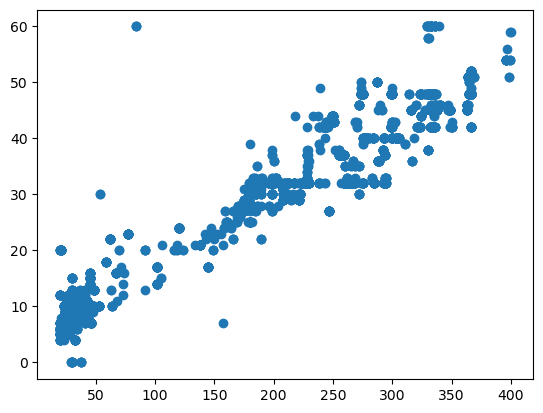

In [20]:
plt.scatter(x, y)
plt.show()

In [236]:
data[0:10]

array([[294.],
       [ 23.],
       [ 22.],
       [ 35.],
       [265.],
       [  0.],
       [333.],
       [ 24.],
       [ 19.],
       [259.]])

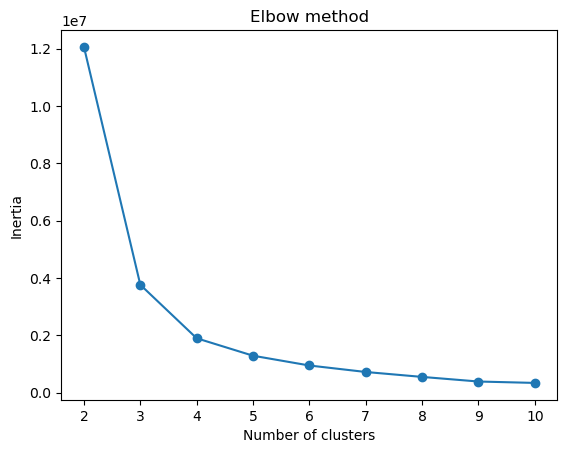

In [21]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

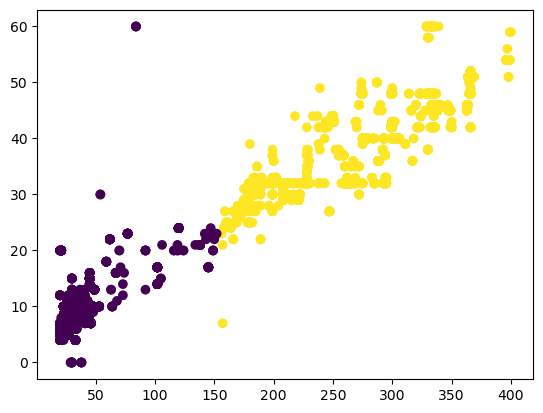

In [22]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

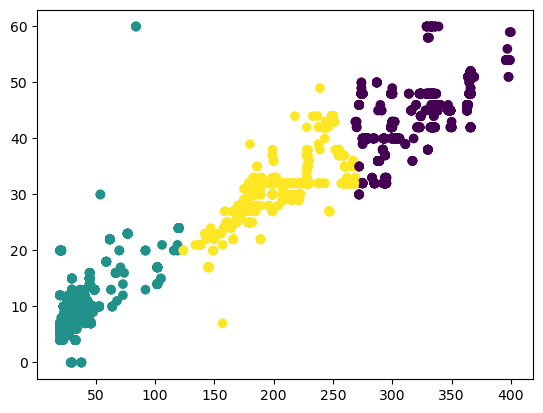

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

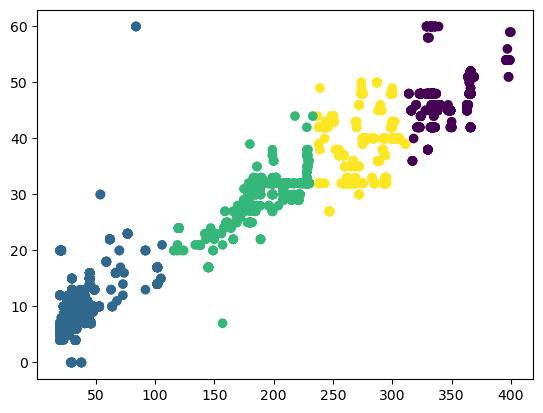

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

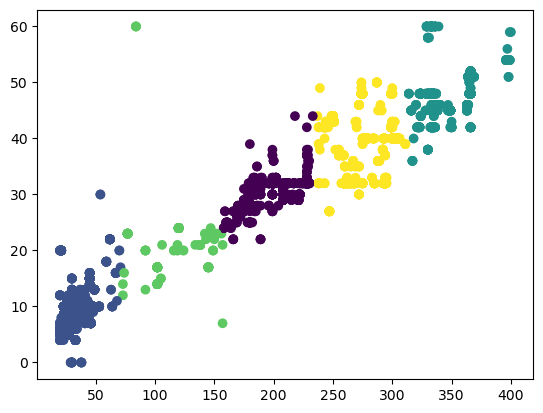

In [26]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [ ]:
inertias = []

In [25]:
working_area2 = df[['Length', 'Draft']].dropna().reset_index(drop=True)
working_area2

,Length,Draft
0,294.0,8.3
1,265.0,11.5
2,333.0,13.0
3,259.0,12.6
4,293.0,11.7
...,...,...
2972,189.0,12.8
2973,366.0,14.2
2974,189.0,12.6
2975,102.0,6.6


In [27]:
x = working_area2['Length']
y = working_area2['Draft']
x, y

(0       294.0
 1       265.0
 2       333.0
 3       259.0
 4       293.0
         ...  
 2972    189.0
 2973    366.0
 2974    189.0
 2975    102.0
 2976    294.0
 Name: Length, Length: 2977, dtype: float64,
 0        8.3
 1       11.5
 2       13.0
 3       12.6
 4       11.7
         ... 
 2972    12.8
 2973    14.2
 2974    12.6
 2975     6.6
 2976     9.1
 Name: Draft, Length: 2977, dtype: float64)

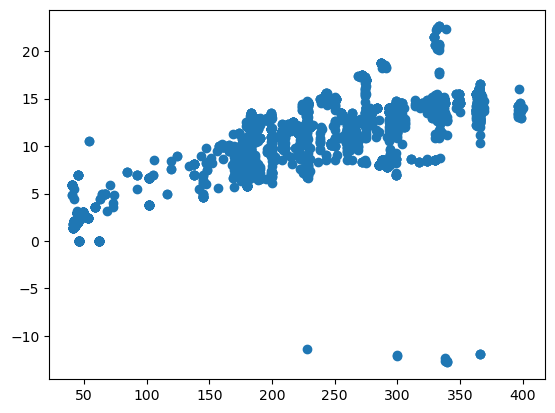

In [28]:
plt.scatter(x, y)
plt.show()

In [236]:
data[0:10]

array([[294.],
       [ 23.],
       [ 22.],
       [ 35.],
       [265.],
       [  0.],
       [333.],
       [ 24.],
       [ 19.],
       [259.]])

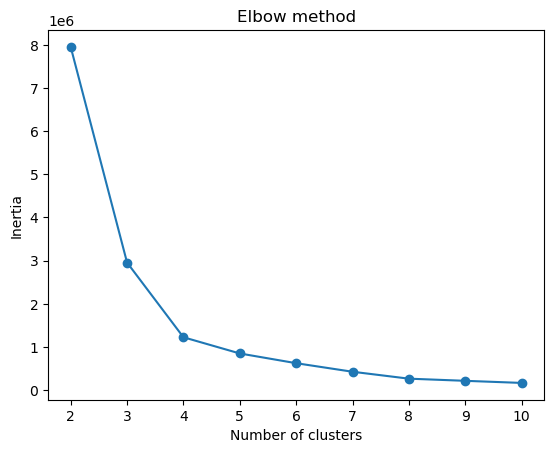

In [29]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

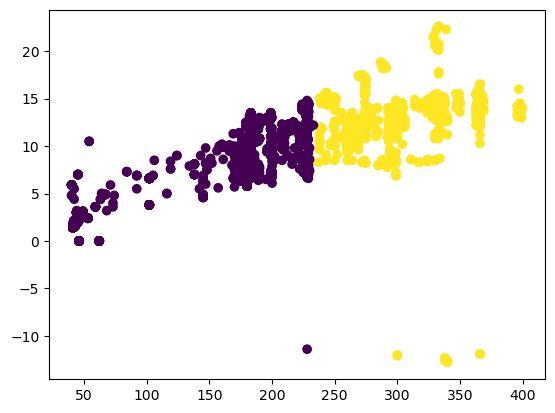

In [30]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

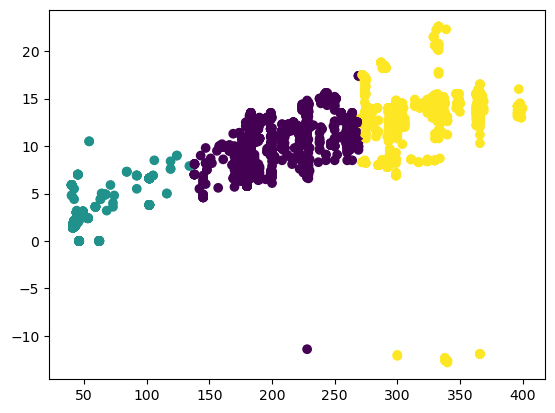

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

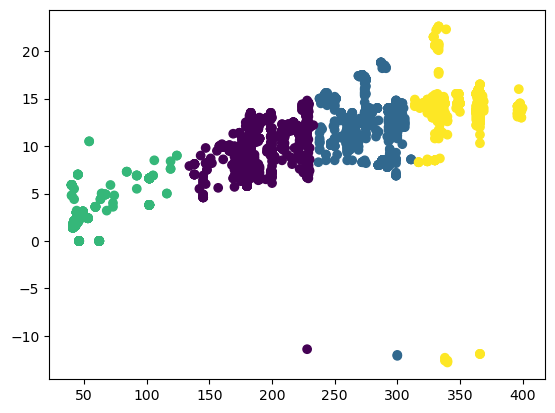

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

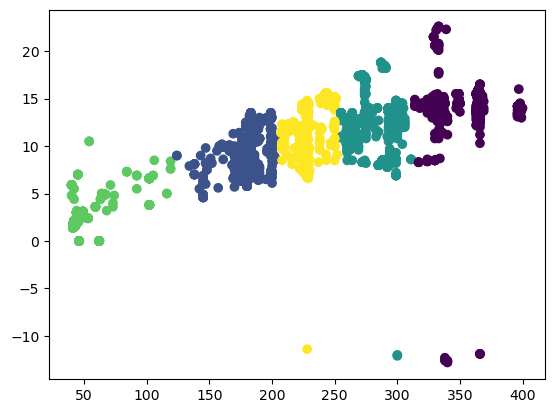

In [33]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [35]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,LONpx_X2,LATpx_Y2
0,311827000,2021-01-06 01:50:18.500,33.735010,-118.143113,0.1,0.8,261.0,NORWEGIAN JEWEL,IMO9304045,C6TX6,60.0,1.0,294.0,37.0,8.3,NaN,A,3018,1097
1,636019717,2021-01-06 01:50:18.500,33.677190,-118.210063,0.2,295.9,269.0,VOLANS,IMO9430777,D5VV2,71.0,1.0,265.0,32.0,11.5,71.0,A,2272,1741
2,416464000,2021-01-06 01:50:18.500,33.754330,-118.275500,0.0,330.6,331.0,YM UNICORN,IMO9462732,BLHI,70.0,5.0,333.0,42.0,13.0,NaN,A,1544,882
3,477014800,2021-01-06 01:50:18.500,33.724734,-118.216842,0.0,2.4,260.0,SEASPAN HAMBURG,IMO9224300,VRBH6,70.0,1.0,259.0,32.0,12.6,NaN,A,2197,1212
4,248699000,2021-01-06 01:50:18.500,33.733279,-118.252887,0.0,254.0,251.0,APL FLORIDA,IMO9350032,9HA4766,71.0,5.0,293.0,40.0,11.7,71.0,A,1796,1117


In [34]:
df.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'TranscieverClass', 'LONpx_X2', 'LATpx_Y2'],
      dtype='object')

In [40]:
working_area3 = df[['SOG', 'COG', 'Heading', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo']].dropna().reset_index(drop=True)
working_area3

,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo
0,0.2,295.9,269.0,71.0,1.0,265.0,32.0,11.5,71.0
1,0.0,254.0,251.0,71.0,5.0,293.0,40.0,11.7,71.0
2,10.3,271.0,270.0,70.0,0.0,322.0,42.0,14.5,70.0
3,0.0,71.0,198.0,70.0,5.0,303.0,40.0,14.0,79.0
4,0.0,250.0,250.0,79.0,5.0,299.0,42.0,12.2,79.0
...,...,...,...,...,...,...,...,...,...
2796,0.0,232.9,307.0,70.0,1.0,189.0,32.0,12.8,70.0
2797,0.0,316.1,71.0,74.0,5.0,366.0,51.0,14.2,74.0
2798,0.1,243.9,296.0,70.0,1.0,189.0,32.0,12.6,70.0
2799,0.0,357.5,176.0,80.0,5.0,102.0,17.0,6.6,80.0


In [41]:
import plotly.express as px
fig = px.scatter_matrix(working_area3, width=1200, height=1600)
fig.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=working_area3
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

AttributeError: 'NoneType' object has no attribute 'split'

In [43]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=working_area3.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig.show()

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [45]:
x = working_area3

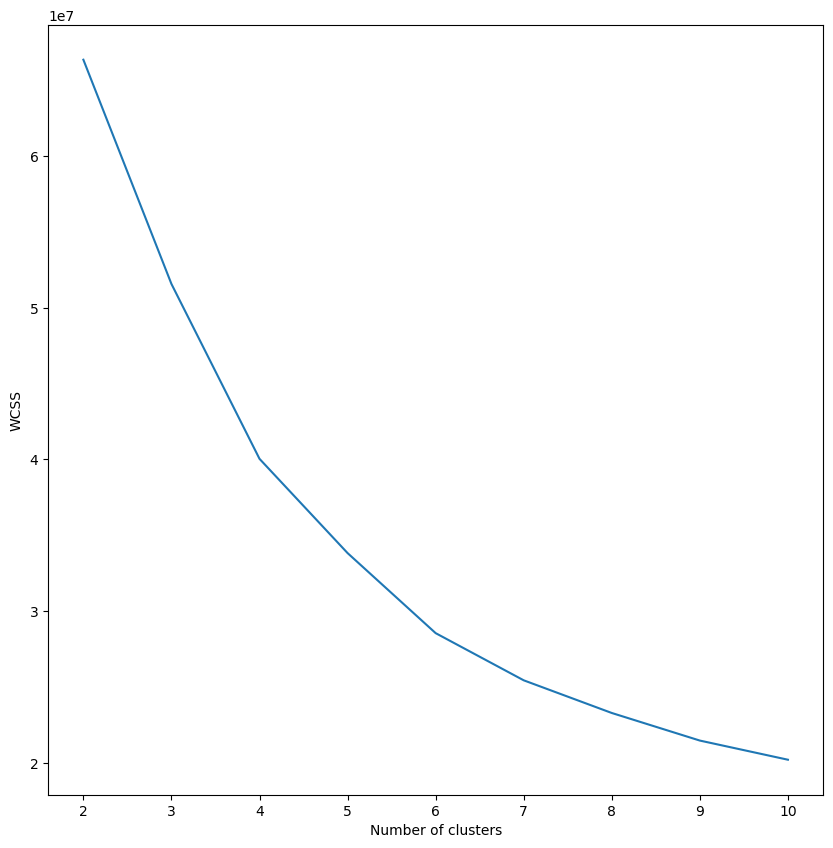

In [47]:
wcss = []
for i in range(2,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(x)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(2,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
pca = PCA(2)
data = pca.fit_transform(x)

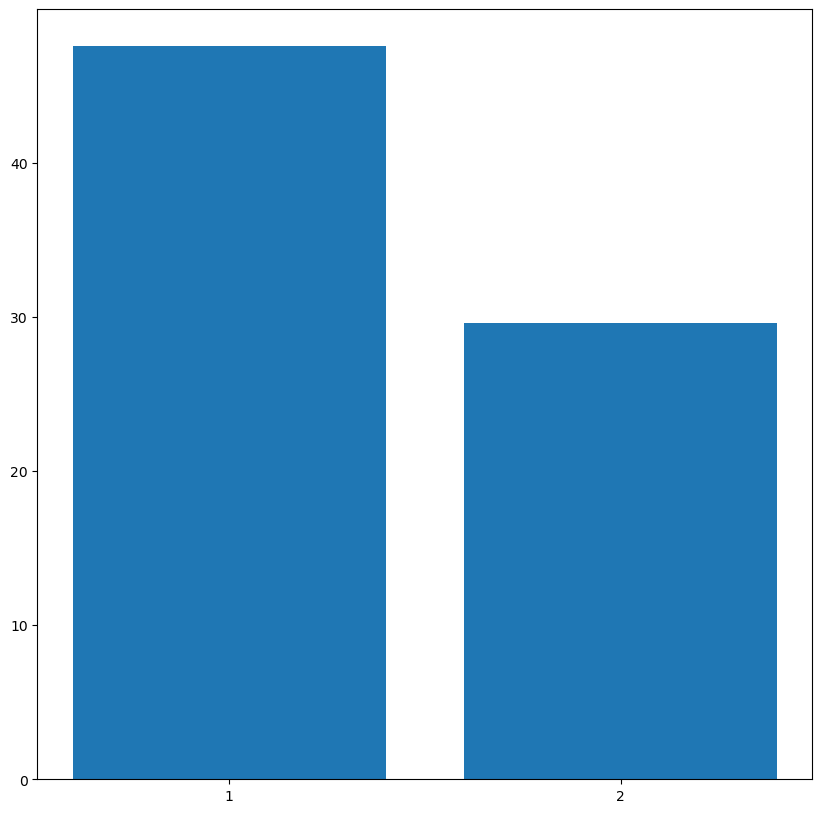

In [49]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

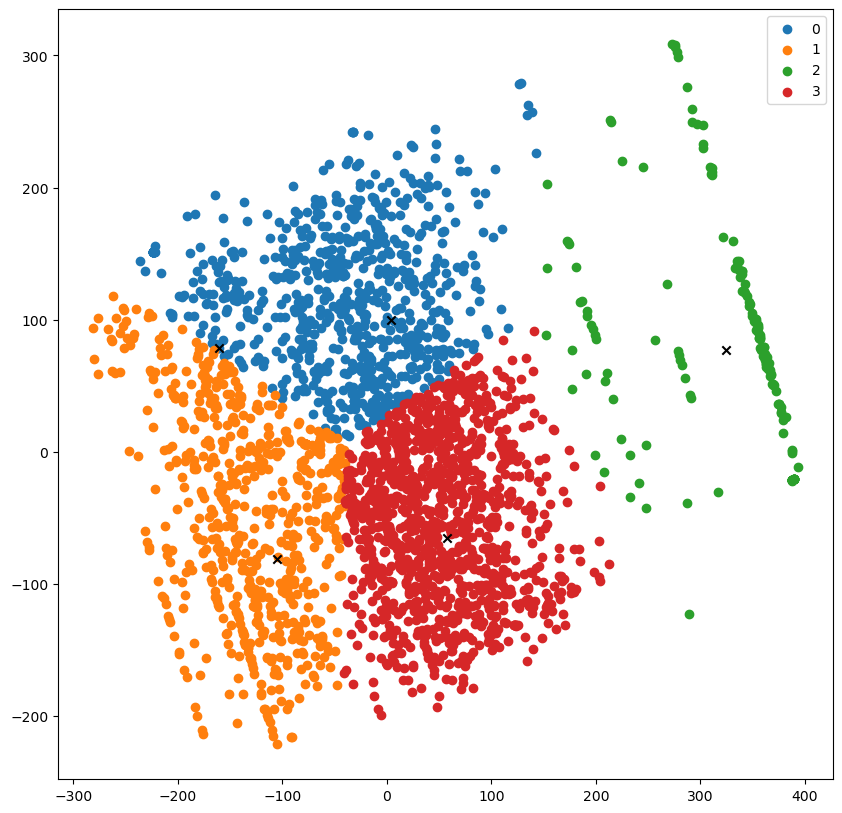

In [53]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

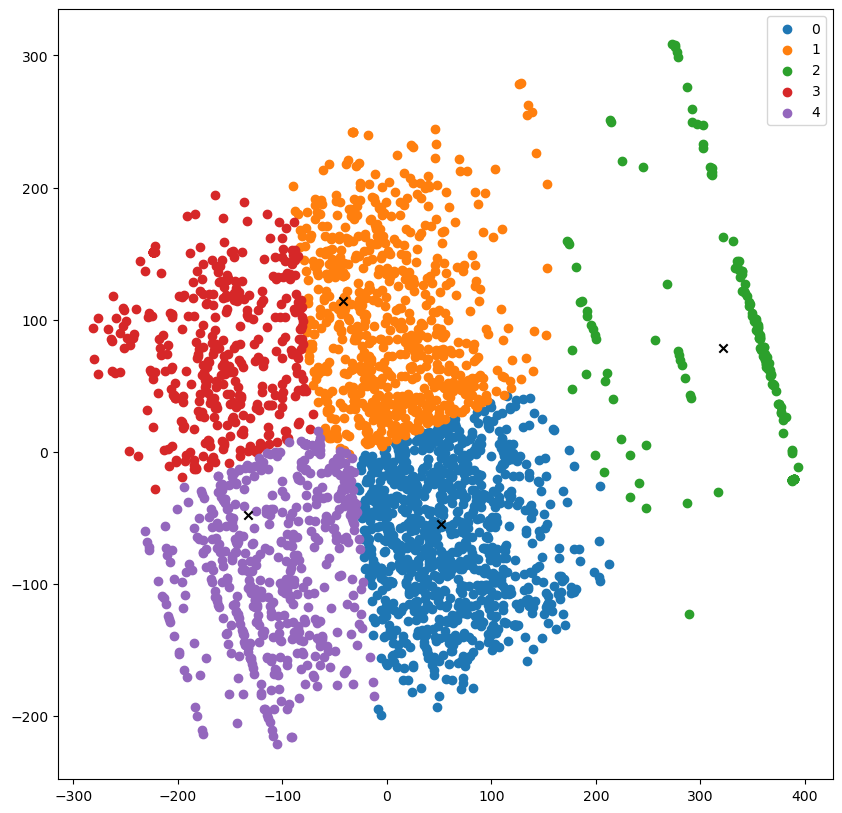

In [54]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

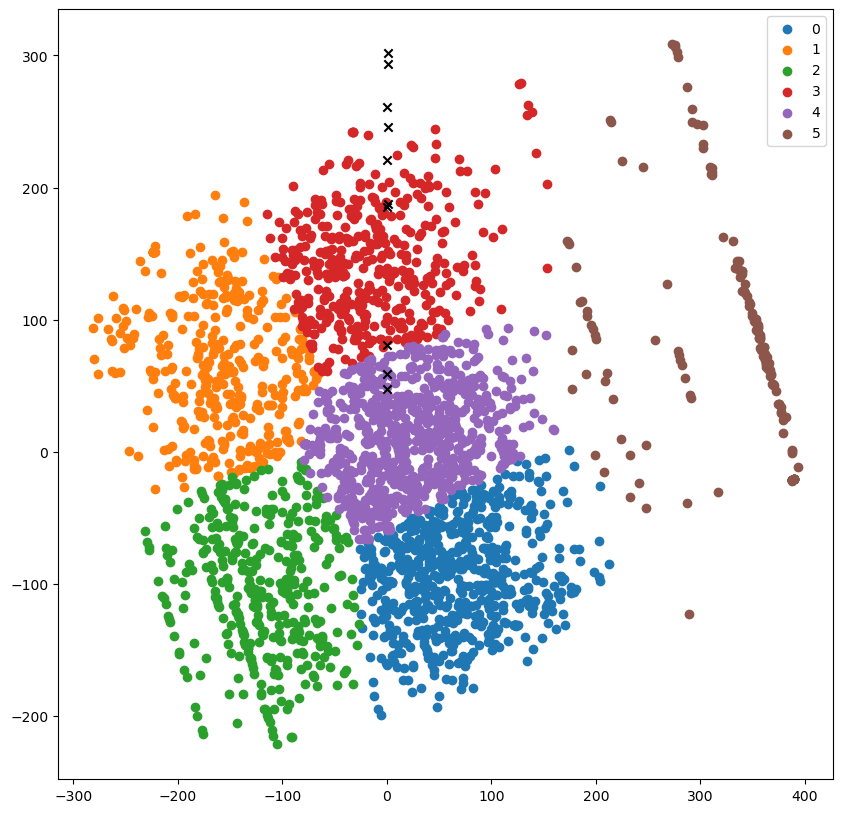

In [51]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 6, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()